# Basic usage of pytidycensus

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mmann1123/pytidycensus/blob/main/examples/01_basic_usage.ipynb)

This notebook demonstrates the basic functionality of **pytidycensus**, a Python library for accessing US Census Bureau data with pandas and GeoPandas support.

## Setup

First, let's install and import the necessary packages:

In [ ]:
# Uncomment to install if running in Colab
# !pip install pytidycensus matplotlib

import pytidycensus as tc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styling
plt.style.use('default')
sns.set_palette("husl")

## Census API Key

To use pytidycensus, you need a free API key from the US Census Bureau. Get one at: https://api.census.gov/data/key_signup.html

Set your API key:

In [ ]:
# Replace with your actual API key
tc.set_census_api_key("Your API Key Here")

# # Alternatively, set as environment variable:
# import os
# os.environ['CENSUS_API_KEY'] = 'Your API Key Here'

## Core Functions

pytidycensus provides two main functions:

- **`get_decennial()`**: Access to 2000, 2010, and 2020 decennial US Census APIs
- **`get_acs()`**: Access to 1-year and 5-year American Community Survey APIs

### Example: Median Age by State (2020 Census)

Let's look at median age by state from the 2020 Census:

In [4]:
# Get median age by state from 2020 Census
age_2020 = tc.get_decennial(
    geography="state",
    variables="P13_001N",  # Median age variable
    year=2020,
    sumfile="dhc"  # Demographic and Housing Characteristics file
)

print(f"Data shape: {age_2020.shape}")
age_2020.head()

Getting data from the 2020 decennial Census
Using the Demographic and Housing Characteristics File
Data shape: (52, 4)


/home/mmann1123/miniconda3/envs/test2/lib/python3.11/site-packages/pytidycensus/decennial.py:327: UserWarning: Note: 2020 decennial Census data use differential privacy, a technique that introduces errors into data to preserve respondent confidentiality. Small counts should be interpreted with caution. See https://www.census.gov/library/fact-sheets/2021/protecting-the-confidentiality-of-the-2020-census-redistricting-data.html for additional guidance.
  warnings.warn(


,state,GEOID,variable,value
0,09,09,P13_001N,41.1
1,10,10,P13_001N,41.1
2,11,11,P13_001N,33.9
3,12,12,P13_001N,43.0
4,13,13,P13_001N,37.5


The function returns a pandas DataFrame with four columns:

- **`GEOID`**: Identifier for the geographical unit
- **`NAME`**: Descriptive name of the geographical unit  
- **`variable`**: Census variable represented in the row
- **`value`**: Value of the variable for that unit

### Visualizing the Data

Since we have a tidy DataFrame, we can easily visualize it:

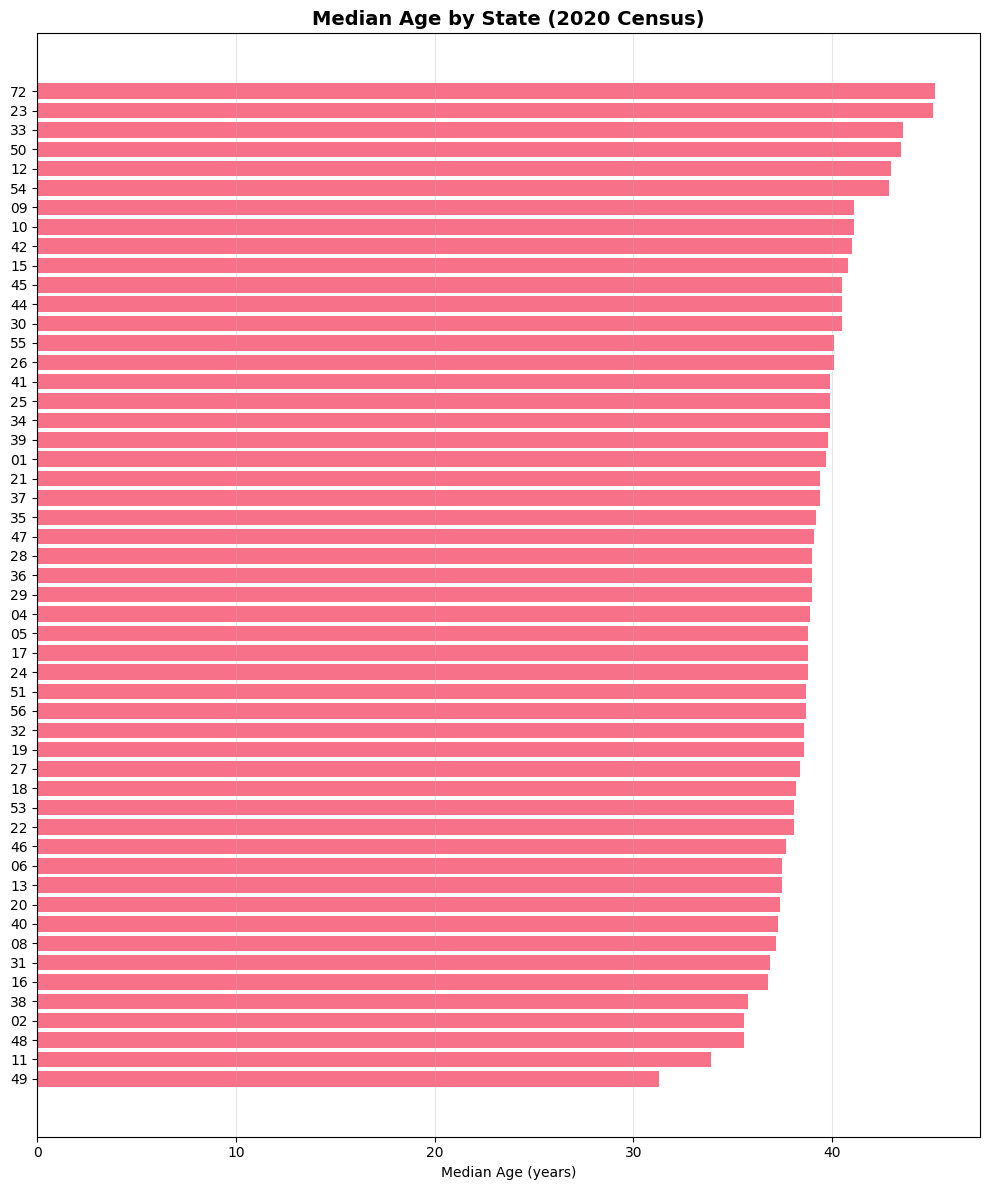

In [5]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 12))

# Sort by median age and plot
age_sorted = age_2020.sort_values('value')
plt.barh(range(len(age_sorted)), age_sorted['value'])
plt.yticks(range(len(age_sorted)), age_sorted['state'])
plt.xlabel('Median Age (years)')
plt.title('Median Age by State (2020 Census)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Geography in pytidycensus

pytidycensus supports many geographic levels. Here are the most commonly used:

| Geography | Definition | Example Usage |
|-----------|------------|---------------|
| `"us"` | United States | National data |
| `"state"` | State or equivalent | State-level data |
| `"county"` | County or equivalent | County-level data |
| `"tract"` | Census tract | Neighborhood-level data |
| `"block group"` | Census block group | Sub-neighborhood data |
| `"place"` | Census-designated place | City/town data |
| `"zcta"` | ZIP Code Tabulation Area | ZIP code areas |

### Example: County Data

Let's get population data for counties in Texas:

In [6]:
# Get total population for Texas counties
tx_pop = tc.get_decennial(
    geography="county",
    variables="P1_001N",  # Total population
    state="TX",  # Filter to Texas
    year=2020
)

print(f"Number of Texas counties: {len(tx_pop)}")
tx_pop.head()

Getting data from the 2020 decennial Census
Using the PL 94-171 Redistricting Data Summary File
Number of Texas counties: 254


/home/mmann1123/miniconda3/envs/test2/lib/python3.11/site-packages/pytidycensus/decennial.py:327: UserWarning: Note: 2020 decennial Census data use differential privacy, a technique that introduces errors into data to preserve respondent confidentiality. Small counts should be interpreted with caution. See https://www.census.gov/library/fact-sheets/2021/protecting-the-confidentiality-of-the-2020-census-redistricting-data.html for additional guidance.
  warnings.warn(


,state,county,GEOID,variable,value
0,48,001,48001,P1_001N,57922
1,48,003,48003,P1_001N,18610
2,48,005,48005,P1_001N,86395
3,48,007,48007,P1_001N,23830
4,48,009,48009,P1_001N,8560


## Searching for Variables

The Census has thousands of variables. Use `load_variables()` to search for what you need:

In [7]:
# Load variables for 2022 5-year ACS
variables_2022 = tc.load_variables(2022, "acs", "acs5", cache=True)

print(f"Total variables available: {len(variables_2022)}")
variables_2022.head()

Loaded cached variables for 2022 acs acs5
Total variables available: 28193


,name,label,concept,predicateType,group,limit,table
0,AIANHH,Geography,,,N/A,0,NaN
1,AIHHTL,Geography,,,N/A,0,NaN
2,AIRES,Geography,,,N/A,0,NaN
3,ANRC,Geography,,,N/A,0,NaN
4,B01001A_001E,Estimate!!Total:,Sex by Age (White Alone),int,B01001A,0,B01001A


In [8]:
# Search for income-related variables
income_vars = tc.search_variables("median household income", 2022, "acs", "acs5")
print(f"Found {len(income_vars)} income-related variables")
income_vars[['name', 'label']].head(10)

Loaded cached variables for 2022 acs acs5
Found 25 income-related variables


,name,label
0,B19013A_001E,Estimate!!Median household income in the past ...
1,B19013B_001E,Estimate!!Median household income in the past ...
2,B19013C_001E,Estimate!!Median household income in the past ...
3,B19013D_001E,Estimate!!Median household income in the past ...
4,B19013E_001E,Estimate!!Median household income in the past ...
5,B19013F_001E,Estimate!!Median household income in the past ...
6,B19013G_001E,Estimate!!Median household income in the past ...
7,B19013H_001E,Estimate!!Median household income in the past ...
8,B19013I_001E,Estimate!!Median household income in the past ...
9,B19013_001E,Estimate!!Median household income in the past ...


## Working with ACS Data

American Community Survey (ACS) data includes estimates with margins of error, since it's based on a sample rather than a complete count.

### Example: Median Household Income

Let's get median household income for Vermont counties:

In [9]:
# Get median household income for Vermont tracts
vt_income = tc.get_acs(
    geography="tract",
    variables={"medincome": "B19013_001"},  # Can use dictionary for variable names
    state="VT",
    year=2022,
    output="wide",  # Get data in wide format
)

vt_income

Getting data from the 2018-2022 5-year ACS


,medincome,state,county,tract,GEOID,medincome_moe
0,96154,50,001,960100,50001960100,18071.0
1,106328,50,001,960200,50001960200,22525.0
2,72171,50,001,960300,50001960300,19890.0
3,99056,50,001,960400,50001960400,5760.0
4,75875,50,001,960500,50001960500,15001.0
...,...,...,...,...,...,...
188,64756,50,027,966501,50027966501,8833.0
189,103750,50,027,966502,50027966502,12857.0
190,64364,50,027,966600,50027966600,5805.0
191,56875,50,027,966700,50027966700,12544.0


Notice that ACS data returns `estimate` and `moe` (margin of error) columns instead of a single `value` column.

### Visualizing Uncertainty

We can visualize the uncertainty around estimates using error bars:

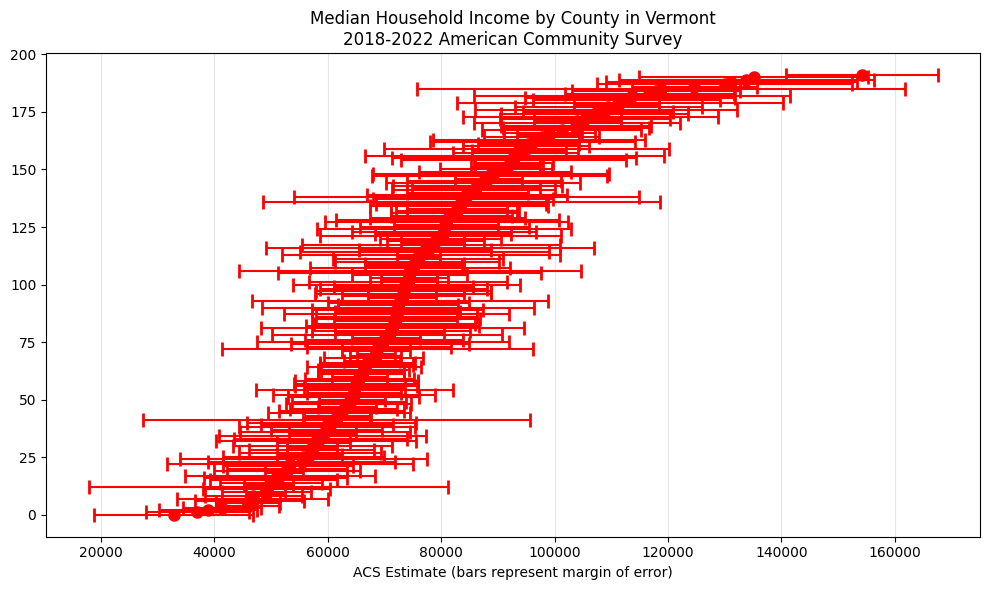

In [10]:
# Clean county names and create visualization
vt_clean = vt_income.copy()
vt_clean = vt_clean.sort_values("medincome")
vt_clean.dropna(subset=["medincome"], inplace=True)
plt.figure(figsize=(10, 6))

# Create error bar plot
plt.errorbar(
    vt_clean["medincome"],
    range(len(vt_clean)),
    xerr=vt_clean["medincome_moe"],  # Using margin of error as error bars
    fmt="o",
    color="red",
    markersize=8,
    capsize=5,
    capthick=2,
)

plt.xlabel('ACS Estimate (bars represent margin of error)')
plt.title('Median Household Income by County in Vermont\n2018-2022 American Community Survey')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Data Output Formats

By default, pytidycensus returns data in "tidy" format. You can also request "wide" format:

### Tidy Format (Default)

In [11]:
# Multiple variables in tidy format
ca_demo_tidy = tc.get_acs(
    geography="county",
    variables={
        "total_pop": "B01003_001",
        "median_income": "B19013_001",
        "median_age": "B01002_001"
    },
    state="CA",
    year=2022,
    output="tidy"  # This is the default
)

print(f"Tidy format shape: {ca_demo_tidy.shape}")
ca_demo_tidy 

Getting data from the 2018-2022 5-year ACS
Tidy format shape: (348, 5)


,state,county,GEOID,variable,value
0,06,001,06001,total_pop,1663823
1,06,003,06003,total_pop,1515
2,06,005,06005,total_pop,40577
3,06,007,06007,total_pop,213605
4,06,009,06009,total_pop,45674
...,...,...,...,...,...
343,06,107,06107,median_age_moe,0.2
344,06,109,06109,median_age_moe,0.4
345,06,111,06111,median_age_moe,0.2
346,06,113,06113,median_age_moe,0.2


### Wide Format

In [ ]:
# Same data in wide format
ca_demo_wide = tc.get_acs(
    geography="county",
    variables={
        "total_pop": "B01003_001",
        "median_income": "B19013_001", 
        "median_age": "B01002_001"
    },
    state="CA",
    year=2022,
    output="wide"
)

print(f"Wide format shape: {ca_demo_wide.shape}")
ca_demo_wide.head()

## Multiple Variables Analysis

Let's analyze the relationship between different demographic variables:

In [ ]:
# Create scatter plot of median age vs median income
plt.figure(figsize=(10, 6))

plt.scatter(
    ca_demo_wide['median_age'], 
    ca_demo_wide['median_income'],
    s=ca_demo_wide['total_pop']/5000,  # Size by population
    alpha=0.6
)

plt.xlabel('Median Age (years)')
plt.ylabel('Median Household Income ($)')
plt.title('Median Age vs Median Income by California County\n(Bubble size = Population)')
plt.grid(alpha=0.3)

# Add correlation coefficient
correlation = ca_demo_wide['median_age'].corr(ca_demo_wide['median_income'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## Working with Different Survey Types

The ACS has different survey periods:

- **5-year ACS** (`survey="acs5"`): More reliable for small areas, 5-year average
- **1-year ACS** (`survey="acs1"`): More current, only for areas with 65,000+ population

In [ ]:
# Compare 1-year vs 5-year estimates for large cities
cities_5yr = tc.get_acs(
    geography="place",
    variables="B19013_001",
    state="CA", 
    year=2022,
    survey="acs5"
)

cities_1yr = tc.get_acs(
    geography="place",
    variables="B19013_001",
    state="CA",
    year=2022, 
    survey="acs1"
)

print(f"5-year ACS places: {len(cities_5yr)}")
print(f"1-year ACS places: {len(cities_1yr)}")
print("\n1-year ACS is only available for larger places:")
cities_1yr.head()

## Summary

In this notebook, we learned:

1. **Setup**: How to install pytidycensus and set your API key
2. **Core functions**: `get_decennial()` and `get_acs()` for different data sources
3. **Geographic levels**: From national to neighborhood-level data
4. **Variable search**: Using `load_variables()` and `search_variables()`
5. **Data formats**: Tidy vs wide format output
6. **Uncertainty**: Working with ACS margins of error
7. **Visualization**: Creating plots with matplotlib

## Next Steps

- **Spatial Analysis**: See `02_spatial_data.ipynb` for mapping examples
- **Advanced ACS**: Explore `03_margins_of_error.ipynb` for statistical techniques
- **Other Datasets**: Check `04_other_datasets.ipynb` for population estimates
- **Microdata**: Learn about PUMS data in `05_pums_data.ipynb`

## Resources

- [pytidycensus Documentation](https://mmann1123.github.io/pytidycensus)
- [Census Variable Search](https://api.census.gov/data.html)
- [Census Bureau Data](https://www.census.gov/data.html)